**2**

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

import seaborn as sns       

from numpy                 import array
from sklearn               import metrics
from sklearn.preprocessing import StandardScaler  
from tensorflow.keras.models          import Sequential 
from tensorflow.keras.layers          import LSTM
from tensorflow.keras.layers import Dense, Dropout

**3**

In [3]:
ttf= pd.read_csv(r'C:\Users\Nomade05\Other\Desktop\memoire_elie\TTF\TTF.csv')
stoxx = pd.read_csv(r'C:\Users\Nomade05\Other\Desktop\memoire_elie\STOXX600\stoxx.csv')
temperature = pd.read_csv(r'C:\Users\Nomade05\Other\Desktop\temp\temperature.csv')
ng = pd.read_csv(r'C:\Users\Nomade05\Other\Desktop\memoire_elie\NG_volume\ng.csv')
inventory = pd.read_csv(r'C:\Users\Nomade05\Other\Desktop\memoire_elie\Inventory\inventory.csv')



**TTF**

In [4]:
ttf

,Date,TTF open price
0,2018-01-31,17.880
1,2018-02-01,18.150
2,2018-02-02,18.160
3,2018-02-05,17.590
4,2018-02-06,17.880
...,...,...
1248,2023-02-03,58.000
1249,2023-02-06,58.110
1250,2023-02-07,57.400
1251,2023-02-08,53.685


**STOXX 600**

In [5]:
stoxx

,Date,stoxx600 open price,stoxx600 high price,stoxx600 low price,stoxx600 close price
0,2018-01-31,396.46,397.46,395.02,395.46
1,2018-02-01,396.43,398.50,392.71,393.49
2,2018-02-02,392.90,392.90,388.00,388.07
3,2018-02-05,386.86,386.86,381.64,382.00
4,2018-02-06,375.74,377.58,369.77,372.79
...,...,...,...,...,...
1248,2023-02-03,457.86,460.77,456.52,460.77
1249,2023-02-06,460.15,460.15,455.24,457.16
1250,2023-02-07,457.80,458.74,456.70,458.19
1251,2023-02-08,459.54,462.76,459.41,459.46


**Natural gas volume**

In [6]:
ng

,Date,Russia,Norway,Denmark,Netherland,Romania,Azerbaïdjan,Algeria,Libya,LNG,Total
0,2018-01-31,4.001608e+09,2.283298e+09,0,1.394093e+09,2.911414e+08,0,1343636635,134004193,6.499597e+08,1.009774e+10
1,2018-02-01,4.005695e+09,2.363729e+09,0,1.414978e+09,2.897282e+08,0,1359645226,137670746,5.449509e+08,1.011640e+10
2,2018-02-02,4.106424e+09,2.366310e+09,0,1.434468e+09,2.902427e+08,0,1353655349,137647764,4.496210e+08,1.013837e+10
3,2018-02-05,4.138753e+09,2.262318e+09,0,1.468978e+09,2.886712e+08,0,1358156286,140085217,5.604534e+08,1.021742e+10
4,2018-02-06,4.130149e+09,2.350556e+09,0,1.608414e+09,2.895000e+08,0,1362608237,134357096,6.437866e+08,1.051937e+10
...,...,...,...,...,...,...,...,...,...,...,...
1248,2023-02-03,7.002253e+08,2.776215e+09,250966567,4.527407e+08,2.555767e+08,352937209,958942936,81640014,1.041795e+09,6.871040e+09
1249,2023-02-06,7.473527e+08,2.282873e+09,236295036,4.259255e+08,2.504748e+08,365608831,971340731,76015735,1.117045e+09,6.472932e+09
1250,2023-02-07,7.721550e+08,2.722883e+09,240325299,4.294571e+08,2.506408e+08,360482573,969793122,75988143,1.306074e+09,7.127799e+09
1251,2023-02-08,7.977022e+08,2.680579e+09,224692776,4.248032e+08,2.518045e+08,360551667,957521683,76099505,1.320554e+09,7.094308e+09


**Temperatures**

In [7]:
temperature.rename(columns={'    DATE': 'Date'}, inplace=True)
temperature

,Date,uk,austria,belgium,croatia,cyprus,czech_republic,denmark,estonia,finland,...,italy,luxembourg,poland,portugal,romania,slovakia,slovenia,spain,sweden,AVG.(celsius)
0,2018-01-31,4.3,5.6,14.1,8.1,NaN,7.7,4.9,0.7,-8.8,...,4.0,5.3,1.5,13.1,0.5,1.3,5.2,6.8,-5.5,2.655556
1,2018-02-01,3.6,3.8,12.1,11.2,NaN,5.7,3.2,1.9,-16.5,...,7.5,1.0,2.6,11.8,1.6,4.0,9.4,4.9,-6.7,1.977778
2,2018-02-02,4.1,1.1,12.9,6.0,NaN,4.5,3.3,1.6,-16.9,...,4.8,0.8,0.1,10.2,4.1,3.1,0.5,2.7,-14.4,0.833333
3,2018-02-05,1.2,-6.2,13.8,4.5,NaN,-0.2,-3.0,-3.7,-18.5,...,3.3,-0.9,-4.0,9.6,3.2,-1.8,0.4,2.0,-12.6,-2.366667
4,2018-02-06,0.6,-4.3,12.6,5.8,NaN,-0.6,-3.1,-4.6,-17.6,...,2.6,-1.9,-3.8,8.4,-1.8,-2.8,-0.4,2.0,-10.4,-2.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2023-02-03,8.9,4.6,NaN,8.1,NaN,6.4,2.3,-1.3,-18.6,...,6.4,6.0,NaN,NaN,2.4,-0.9,4.4,6.7,-7.8,3.655556
1249,2023-02-06,4.5,-1.0,NaN,1.1,NaN,-1.8,0.8,1.6,-9.3,...,3.2,NaN,NaN,NaN,-1.1,-3.4,-3.3,4.8,0.3,1.322222
1250,2023-02-07,1.6,-2.9,NaN,1.6,NaN,-2.5,0.1,1.1,-1.0,...,1.3,0.6,NaN,NaN,-1.5,-2.9,-4.4,3.4,0.5,0.633333
1251,2023-02-08,0.2,-3.8,NaN,0.8,NaN,-1.5,0.5,2.3,-1.1,...,0.5,0.3,NaN,NaN,-3.0,0.2,-2.5,6.2,1.1,0.555556


**Gas in storage**

In [8]:
inventory.rename(columns={'Gas Day Start': 'Date'}, inplace=True)
inventory

,Date,Gas in storage (TWh)
0,2018-01-31,541.5107
1,2018-02-01,535.3090
2,2018-02-02,528.7890
3,2018-02-05,507.8355
4,2018-02-06,498.0268
...,...,...
1248,2023-02-03,795.4579
1249,2023-02-06,781.1293
1250,2023-02-07,773.8317
1251,2023-02-08,766.4607


**4**

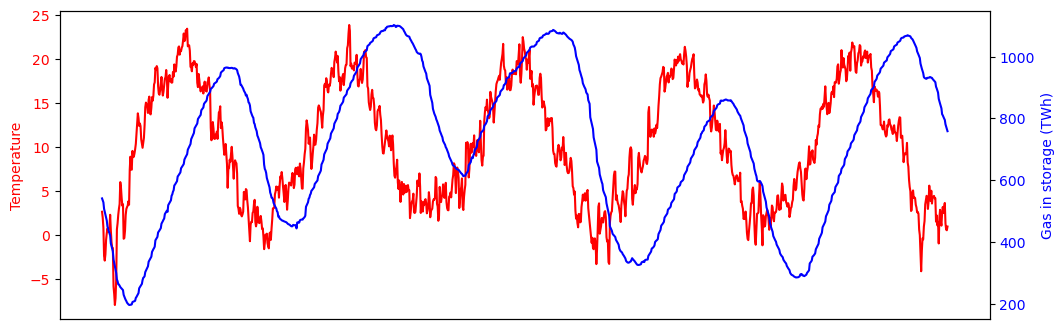

In [9]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(temperature['Date'], temperature['AVG.(celsius)'], 'r-', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature', color='r')
ax1.tick_params(axis='y', labelcolor='r')
 

ax1.set_xlabel('')
ax1.xaxis.set_ticks([])

# Créer un second axe Y
ax2 = ax1.twinx()
ax2.plot(inventory['Date'], inventory['Gas in storage (TWh)'], 'b-', label='Gas in storage (TWh)')
ax2.set_ylabel('Gas in storage (TWh)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

In [10]:
stoxx = stoxx.replace([np.inf, -np.inf], np.nan).dropna()

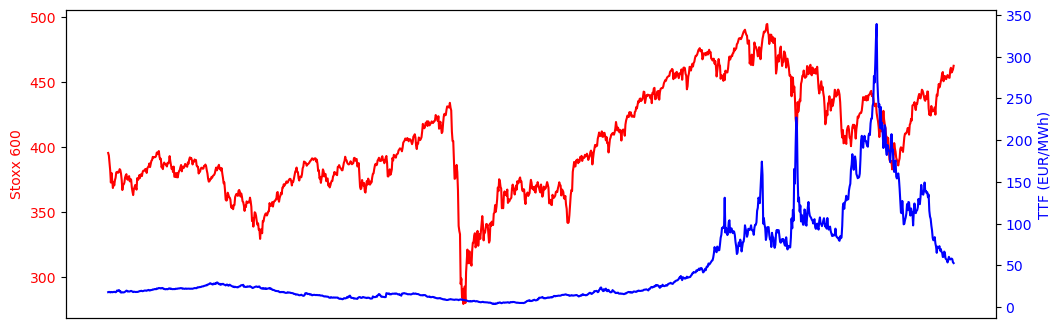

In [11]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(stoxx['stoxx600 close price'], 'r-', label='Stoxx 600')
ax1.set_ylabel('Stoxx 600', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax1.set_xlabel('')
ax1.xaxis.set_ticks([])

ax2 = ax1.twinx()
ax2.plot(ttf['TTF open price'], 'b-', label='TTF')
ax2.set_ylabel('TTF (EUR/MWh)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

In [12]:
ng.tail(3)

,Date,Russia,Norway,Denmark,Netherland,Romania,Azerbaïdjan,Algeria,Libya,LNG,Total
1250,2023-02-07,772154982.0,2.722883e+09,240325299,429457072.4,2.506408e+08,360482573,969793122,75988143,1.306074e+09,7.127799e+09
1251,2023-02-08,797702196.0,2.680579e+09,224692776,424803175.4,2.518045e+08,360551667,957521683,76099505,1.320554e+09,7.094308e+09
1252,2023-02-09,789401461.0,2.762461e+09,256346408,438640823.7,2.512024e+08,349220527,969828518,108611150,1.333907e+09,7.259619e+09


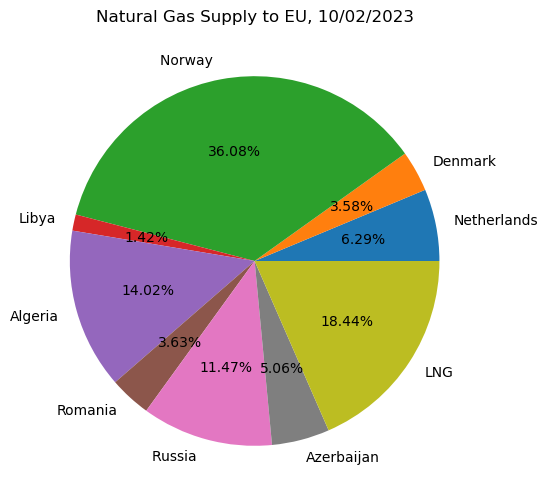

In [26]:
fig=plt.figure(figsize=(12,6))
df_ng = pd.DataFrame([
    ['Netherlands', 434564742.5], ['Denmark', 247261236],['Norway ', 2491303989],  ['Libya', 97790614], ['Algeria', 968246178], ['Romania', 250994763.9],
    ['Russia ', 792325800],  ['Azerbaijan', 349131215 ], ['LNG', 1273458096]],columns=['country', 'supply'])
plt.pie(df_ng['supply'], labels=df_ng['country'], autopct='%1.2f%%')
plt.title('Natural Gas Supply to EU, 10/02/2023')
plt.show()

**5**

In [27]:
df0 = pd.merge(ng, inventory,on="Date",how="outer")
df1 = pd.merge(df0, temperature,on='Date',how="outer")
df2 = pd.merge(df1, stoxx,on='Date',how="outer")
df = pd.merge(df2, ttf,on='Date',how="outer")

In [28]:
df.isnull().sum()

Date                       0
Russia                     0
Norway                     0
Denmark                    0
Netherland                 0
Romania                    0
Azerbaïdjan                0
Algeria                    0
Libya                      0
LNG                        0
Total                      0
Gas in storage (TWh)       0
uk                         0
austria                    0
belgium                  669
croatia                    1
cyprus                  1253
czech_republic            23
denmark                    0
estonia                    0
finland                  153
france                     0
germany                    0
hungary                   10
ireland                    0
italy                     30
luxembourg                 1
poland                   986
portugal                 565
romania                    0
slovakia                   1
slovenia                   9
spain                      0
sweden                     0
AVG.(celsius) 

In [29]:
df = df.fillna(method='ffill')

In [30]:
df.columns
df = df.drop('cyprus',axis=1)

In [31]:
df.isnull().sum()

Date                    0
Russia                  0
Norway                  0
Denmark                 0
Netherland              0
Romania                 0
Azerbaïdjan             0
Algeria                 0
Libya                   0
LNG                     0
Total                   0
Gas in storage (TWh)    0
uk                      0
austria                 0
belgium                 0
croatia                 0
czech_republic          0
denmark                 0
estonia                 0
finland                 0
france                  0
germany                 0
hungary                 0
ireland                 0
italy                   0
luxembourg              0
poland                  0
portugal                0
romania                 0
slovakia                0
slovenia                0
spain                   0
sweden                  0
AVG.(celsius)           0
stoxx600 open price     0
stoxx600 high price     0
stoxx600 low price      0
stoxx600 close price    0
TTF open pri

**6**

C:\Users\Nomade05\AppData\Local\Temp\ipykernel_19012\1575886176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


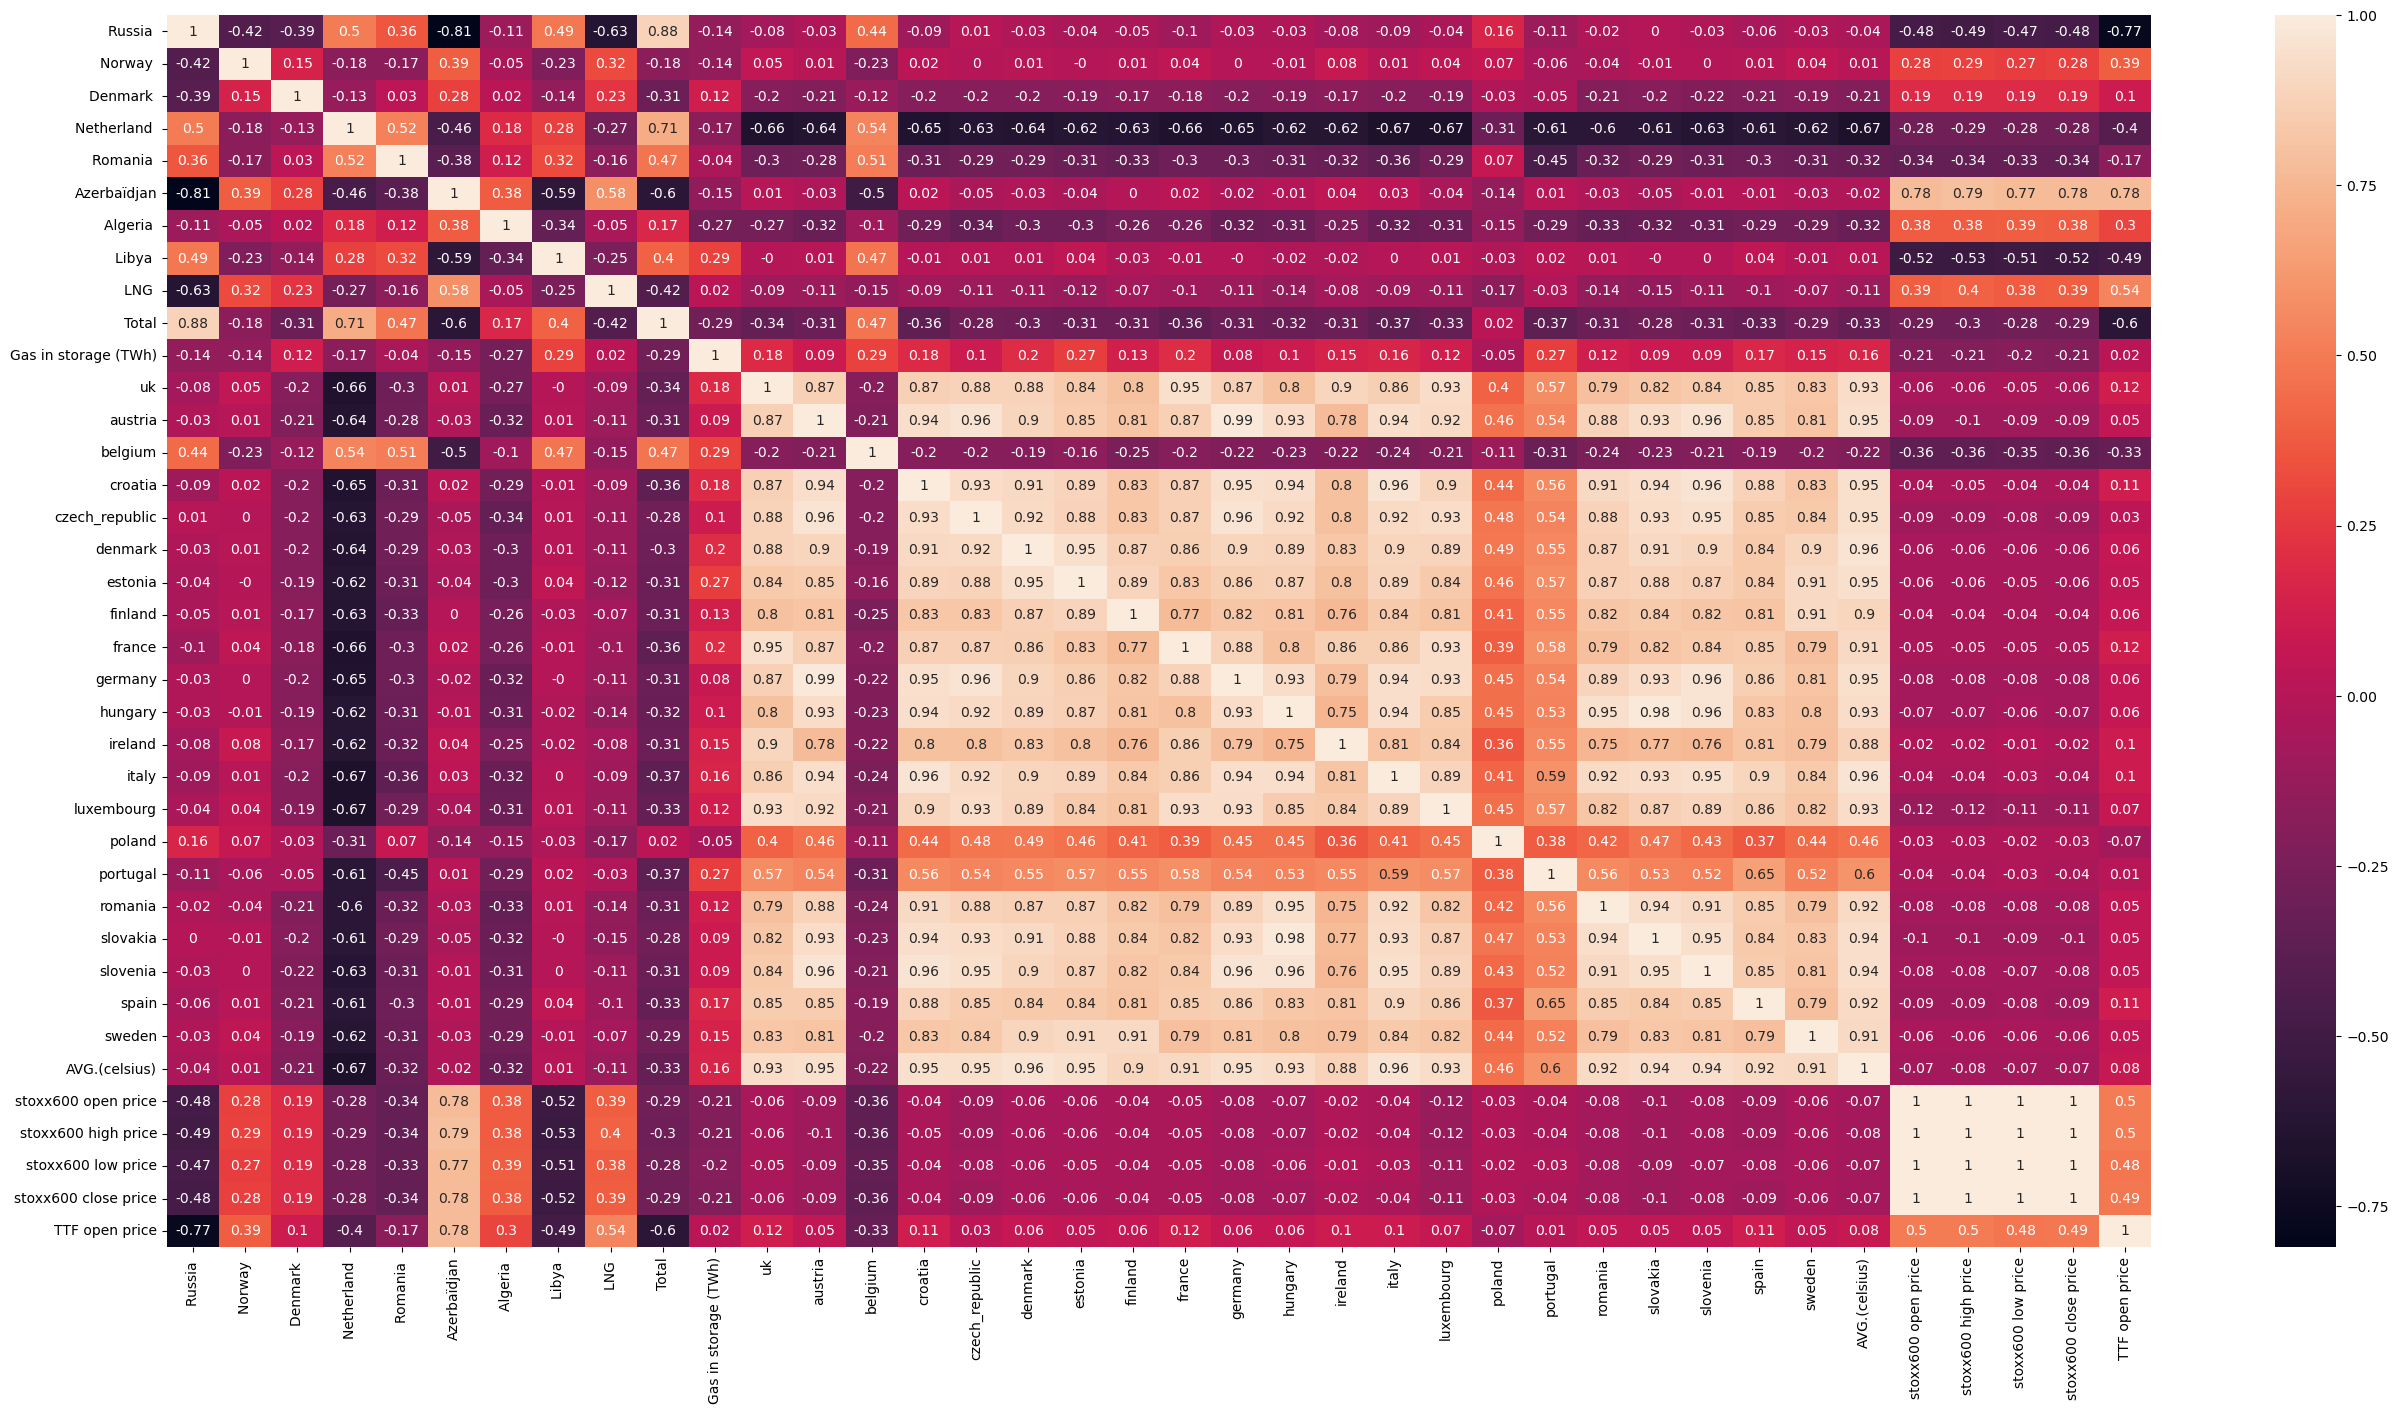

In [32]:
correlation_matrix = df.corr().round(2)
# annot = True 讓我們可以把數字標進每個格子裡
plt.figure(figsize=(32,16))
sns.heatmap(data=correlation_matrix, annot = True)
plt.show()

As you can see from the graph above :
- The correlation between TTF gas price and stoxx600 is 0.5. 
- The correlation with gas imports into Azerbaidjan is 0.78.  
- Positive correlation bewteen Norway and Azerbaidjan. 
- Negative correlation with Russia exports, lybian exports and European stocks

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1253 non-null   object 
 1   Russia                1253 non-null   float64
 2   Norway                1253 non-null   float64
 3   Denmark               1253 non-null   int64  
 4   Netherland            1253 non-null   float64
 5   Romania               1253 non-null   float64
 6   Azerbaïdjan           1253 non-null   int64  
 7   Algeria               1253 non-null   int64  
 8   Libya                 1253 non-null   int64  
 9   LNG                   1253 non-null   float64
 10  Total                 1253 non-null   float64
 11  Gas in storage (TWh)  1253 non-null   float64
 12  uk                    1253 non-null   float64
 13  austria               1253 non-null   float64
 14  belgium               1253 non-null   float64
 15  croatia              

**7**

In [ ]:
df_input=df[['Azerbaijan','Russia','Norway','Netherlands',"Libya",'LNG',,'stoxx600 open price',
                      'stoxx600 hight price', 'stoxx600 low price','TTF open Price']]
df_input.head(4)